In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['text.usetex'] = True

import pink_utils as pu
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
hm = pu.heatmap('../Experiment/Experiment_F3W2_95_5/F3W2_95_5_Testing_Images_EDMatrix.bin')
images = pu.image_binary('../Experiment/Experiment_F3W2_95_5/F3W2_95_5_Testing_Images.bin')

In [3]:
df = pd.read_csv('../Experiment/Experiment_F3W2_95_5/Test_Images/RGZ_Test_Images_Dataframe.csv')

In [4]:
df.shape

(7464, 78)

In [5]:
images.file_head

(7464, 2, 167, 167)

In [6]:
hm.file_head

(7464, 15, 15, 1)

In [7]:
print('Loading the heatmaps')
maps = [hm.ed(index=i, prob=True) for i in range(hm.file_head[0])]


Loading the heatmaps


In [8]:
import matplotlib.pyplot as plt

In [9]:
from collections import defaultdict

In [10]:
book = defaultdict(list)

for c, row in df.iterrows():
    label = row['label']
    label = label.replace('_','\_') # Tex will complain otherwise
    book[label].append(maps[c])

print(book.keys())

dict_keys(['1\\_1', '1\\_2', '1\\_3', '2\\_2', '2\\_3', '3\\_3'])


1\_1
1\_2
1\_3
2\_2
2\_3
3\_3


/Users/gal16b/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


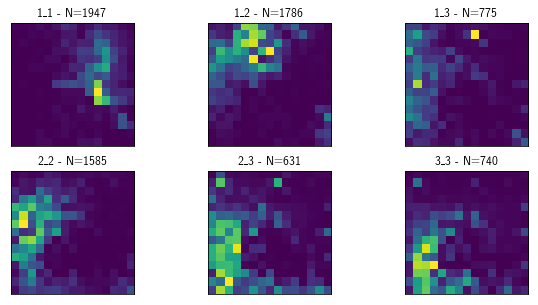

In [11]:
fig, axes = plt.subplots(2,3, figsize=(10,5))

for ax, key in zip(axes.flatten(), book.keys()):
    print(key)
    n = len(book[key])
    mean = np.array(book[key]).mean(axis=0)
    median = np.median(np.array(book[key]), axis=0)
    ax.imshow(mean)
    ax.set(title=f"{key} - N={n}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
fig.show()


/Users/gal16b/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


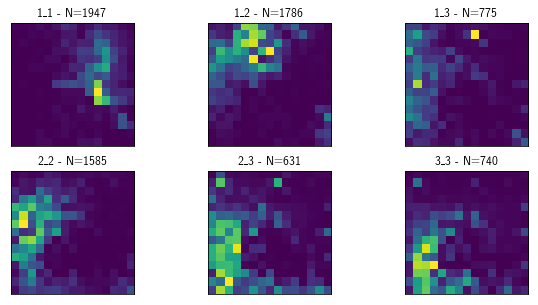

In [12]:
fig, axes = plt.subplots(2,3, figsize=(10,5))

for ax, key in zip(axes.flatten(), book.keys()):
    n = len(book[key])
    mean = np.array(book[key]).mean(axis=0)
    median = np.mean(np.array(book[key]), axis=0)
    ax.imshow(mean)
    ax.set(title=f"{key} - N={n}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
fig.show()

(array([5]), array([11]))
(array([2]), array([5]))
(array([1]), array([8]))
(array([5]), array([1]))
(array([7]), array([3]))
(array([8]), array([4]))


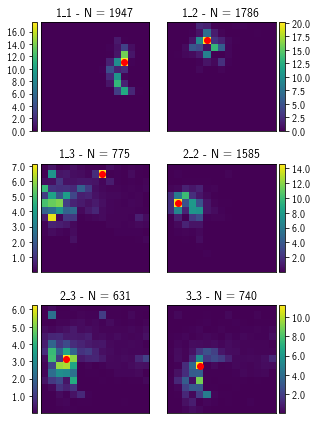

In [13]:
fig, axes = plt.subplots(3,2,figsize=(4.5,6.))

for count, key in enumerate(sorted(book.keys())):
    ax = axes.flatten()[count]
    
    arr = np.array(book[key])
    
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    arr = np.median(arr,axis=0)
    arr = arr / arr.sum() * 100.
    im = ax.imshow(arr)

    pos = np.where(arr==arr.max())
    ax.plot(*pos[::-1], 'ro')
    print(pos)
    ax.set(title=f'{key} - N = {len(book[key])}')
    divider = make_axes_locatable(ax)
    if count % 2 == 0: 
        cax0 = divider.append_axes('left', size='5%', pad=0.05)
        cbar = fig.colorbar(im, cax=cax0, format='%.1f')#, label='Probability')
        cax0.yaxis.set_ticks_position('left')
    else:
        cax0 = divider.append_axes('right', size='5%', pad=0.05)
        cbar = fig.colorbar(im, cax=cax0, format='%.1f')#, label='Probability')
        
# fig.suptitle(f'{key} - N = {len(book[key])}')
fig.tight_layout()
fig.savefig('Images/Figure_Median_Probability.pdf')

# Euclidean distances

In [14]:
print('Loading the heatmaps')
maps = [hm.ed(index=i) for i in range(hm.file_head[0])]
ed = defaultdict(list)

for c, row in df.iterrows():
    label = row['label'].replace('_','\_')
    ed[label].append(maps[c])

Loading the heatmaps


/Users/gal16b/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


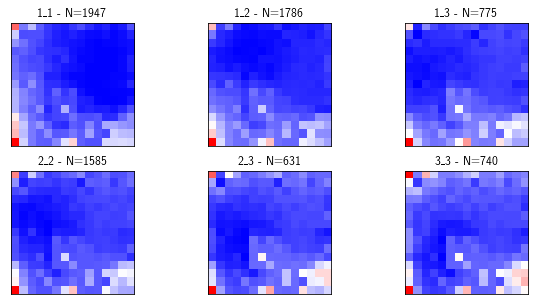

In [15]:
fig, axes = plt.subplots(2,3, figsize=(10,5))

for ax, key in zip(axes.flatten(), book.keys()):
    n = len(book[key])
    mean = np.array(ed[key]).mean(axis=0)
    median = np.median(np.array(ed[key]), axis=0)
    ax.imshow(mean, cmap='bwr')
    ax.set(title=f"{key} - N={n}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
fig.show()

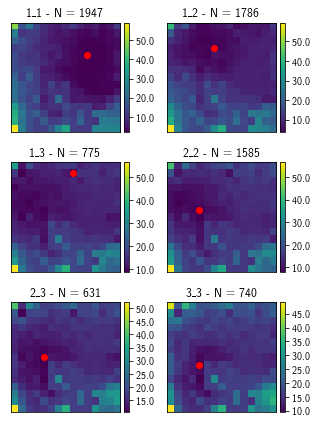

In [16]:
fig, axes = plt.subplots(3,2,figsize=(4.5,6.))

for count, key in enumerate(sorted(ed.keys())):
    ax = axes.flatten()[count]
    
    arr = np.array(ed[key])
    
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    arr = np.median(arr,axis=0)
#     arr = arr / arr.sum()
#     arr *= 100.
#     print(arr.sum())
    im = ax.imshow(arr)

    pos = np.where(arr==arr.min())
    ax.plot(*pos[::-1], 'ro')
    
    ax.set(title=f'{key} - N = {len(book[key])}')
    divider = make_axes_locatable(ax)
    cax0 = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax0, format='%.1f')#, label='Probability')

    
# fig.suptitle(f'{key} - N = {len(book[key])}')
fig.tight_layout()
# fig.show()